In [1]:
# build a database from a dataset for nomenclating
# INPUT: a collection of GAIN domain PDBs, their sequences as one large ".fa" file
from gain_classes import GainDomain, GainCollection, Anchors, GPS
import sse_func
import execute
import numpy as np
import glob
#import multiprocessing as mp
#from subprocess import Popen, PIPE
from tqdm import tqdm
from matplotlib import pyplot as plt
from shutil import copyfile
import math

enum = 157

In [2]:
def filter_by_receptor(sequences, selection):
    new_list = []
    for seq_tup in sequences:
        if selection in seq_tup[0]:
            new_list.append(seq_tup)
    return new_list

def filter_by_list(sequences, selection): # selection list
    new_list = []
    for seq_tup in sequences:
        for it in selection:
            if it in seq_tup[0]:
                new_list.append(seq_tup)
    return new_list

In [6]:
valid_seqs = sse_func.read_multi_seq("/home/hildilab/projects/agpcr_nom/app_gain_gain.fa")
print(len(valid_seqs))
quality_file = "/home/hildilab/projects/agpcr_nom/app_gain_gain.mafft.jal"
#quality_file = f"/home/hildilab/projects/agpcr_nom/app_gain_gain_mafft.{enum}.jal"
alignment_file = "/home/hildilab/projects/agpcr_nom/app_gain_gain.mafft.fa"
#alignment_file = f"/home/hildilab/projects/agpcr_nom/app_gain_gain_mafft.{enum}.fa"
#stride_folder = "/home/hildilab/projects/agpcr_nom/all_gps_stride"
#stride_files = glob.glob("/home/hildilab/projects/agpcr_nom/all_gps_stride/*")
stride_files = glob.glob("/home/hildilab/projects/agpcr_nom/sigmas/sigma_2/*")
# This only contains the sigma files for truncated (?) PDBs.
quality = sse_func.read_quality(quality_file)
#gps_minus_one = 6781 # -1 of the ACTUAL COLUMN (6782) in JALVIEW since there is is ONE-INDEXED
gps_minus_one = 6781 # default: 6781; 160: 6607; 155: 6719
aln_cutoff = 6826 # default: 6826; 160: 6645; 155: 6765

alignment_dict = sse_func.read_alignment(alignment_file, aln_cutoff)

14435


In [ ]:
valid_collection = GainCollection(  alignment_file = alignment_file,
                                    aln_cutoff = aln_cutoff,
                                    quality = quality,
                                    gps_index = gps_minus_one,
                                    stride_files = stride_files,
                                    sequence_files=None,
                                    sequences=valid_seqs,
                                    alignment_dict = alignment_dict,
                                    is_truncated = True,
                                    #coil_weight=0.08, # TESTING
                                    #domain_threshold=20, # TESTING
                                    stride_outlier_mode=True)
#for gain in valid_collection.collection:
#    gain.create_indexing()

receptor_list = ["AGRA2","AGRA3", "AGRB1", "AGRB2", "AGRB3", "AGRC1", "AGRC2", "AGRC3", "AGRD1", 
                "AGRD2", "AGRE1", "AGRE2", "AGRE3", "AGRE4", "AGRE5", "AGRF1", "AGRF2", "AGRF3", 
                "AGRF4", "AGRF5", "AGRG1", "AGRG2", "AGRG3", "AGRG4", "AGRG5", "AGRG6", "AGRG7", 
                "AGRL1", "AGRL2", "AGRL3", "AGRL4", "AGRV1", "AGRA", "AGRB", "AGRC", "AGRD", 
                "AGRE", "AGRF", "AGRG", "AGRL", "AGRV", "_" ]
                #["EGFLAGseven-passG-typereceptor1", "CELR1", "CELSR1"], 
                #["EGFLAGseven-passG-typereceptor2", "CELR2", "CELSR2"]
                #["EGFLAGseven-passG-typereceptor3", "CELR3", "CELSR3"]]
                 
"""receptor_list = [["EGFLAGseven-passG-typereceptor1", "CELR1", "CELSR1"], 
                 ["EGFLAGseven-passG-typereceptor2", "CELR2", "CELSR2"],
                 ["EGFLAGseven-passG-typereceptor3", "CELR3", "CELSR3"],
                 ["EGFLAGseven-passG-typereceptor", "CELR", "CELSR"]]"""
#out_names = ("ADGRC1", "ADGRC2", "ADGRC3", "ADGRC")
for i,group in enumerate(receptor_list):
    parse_string = group
    
    print(parse_string)
    filtered_sequences = filter_by_receptor(valid_seqs, parse_string)
    #filtered_sequences = filter_by_list(valid_seqs, group)
    if len(filtered_sequences) == 0:
        continue
    print(f"Parsed with {parse_string = }: Result : {len(filtered_sequences)} Sequences")
    parsed_collection = GainCollection( alignment_file = alignment_file,
                                        aln_cutoff = aln_cutoff,
                                        quality = quality,
                                        gps_index = gps_minus_one,
                                        stride_files = stride_files,
                                        sequence_files=None,
                                        sequences=filtered_sequences,
                                        alignment_dict = alignment_dict,
                                        is_truncated = True,
                                        coil_weight=0.08 # testing
                                         )
    parsed_collection.plot_sse_hist(title=f"Receptor group: {parse_string} (Total: {len(filtered_sequences)})",
                                   n_max=16,
                                   #savename="hists/%s.adj"%(out_names[i]))
                                   savename="hists/%s"%(str(group)))

In [ ]:
"""    parse_string = "_"
    print(parse_string)
    filtered_sequences = filter_by_receptor(valid_seqs, parse_string)
    #if len(filtered_sequences) == 0:
    print(f"Parsed with {parse_string = }: Result : {len(filtered_sequences)} Sequences")
    parsed_collection = GainCollection( alignment_file = alignment_file,
                                        aln_cutoff = aln_cutoff,
                                        quality = quality,
                                        gps_index = gps_minus_one,
                                        stride_files = stride_files,
                                        sequence_files=None,
                                        sequences=filtered_sequences,
                                        alignment_dict = alignment_dict,
                                        is_truncated = True
                                         )
    parsed_collection.plot_sse_hist(title=f"Receptor group: {parse_string} (Total: {len(filtered_sequences)})",
                                   n_max=16,
                                   savename="hists/%s"%(str(group)))"""

In [3]:
# Function for Parsing out specific Files from the overall dataset based on selection
def grab_selection(parse_string, stride_path, pdb_list, sequences, profile_path, target_dir, seqs=None):
    # grabs PDB file, stride file, profiles, sequence from FASTA and copies to target dir.
    if seqs is None:
        sub_seqs = [seq for seq in sequences if parse_string.lower() in seq[0].lower()]
    else: sub_seqs = seqs
    print(f"Found {len(sub_seqs)} sequences.")
    strides = glob.glob(stride_path+"*.stride")#
    profiles = glob.glob(profile_path+"*.png")
    
    sub_strides = []
    sub_profiles = []
    sub_pdbs = []
    
    for seq in sub_seqs:
        ac = seq[0].split("-")[0]
        [sub_profiles.append(prof) for prof in profiles if ac in prof]
        [sub_strides.append(stride) for stride in strides if ac in stride]
        [sub_pdbs.append(pdb) for pdb in pdb_list if ac in pdb]
    
    for prof in sub_profiles:
        name = prof.split("/")[-1]
        copyfile(prof, target_dir+"profiles/"+name)
    
    for stride in sub_strides:
        name = stride.split("/")[-1]
        copyfile(stride, target_dir+"strides/"+name)
    
    for pdb in sub_pdbs:
        name = pdb.split("/")[-1]
        copyfile(pdb, target_dir+"pdbs/"+name)
        
    for seq in sub_seqs:
        sse_func.write2fasta(seq[1]+"\n", seq[0], target_dir+"seqs/"+seq[0]+".fa")
        
    print(f"Copied {len(sub_pdbs)} PDB files, {len(sub_strides)} STRIDE files,",
          f" {len(sub_profiles)} Profiles and {len(sub_seqs)} Sequences",
          f"for Selection {parse_string}")
    
root_path = "/home/hildilab/projects/agpcr_nom/"
profile_path = root_path+"all_gps_profiles/"
pdb_list = glob.glob(f"{root_path}all_gps*/batch*/*rank_1_*.pdb")
print(len(pdb_list))
#valid_seqs
target_dir = root_path+"human/"

15839


In [ ]:
"""grab_selection(parse_string='HUMAN',
              stride_path = root_path+"all_gps_stride/",
              pdb_list = pdb_list,
              sequences = valid_seqs,
              profile_path = profile_path,
              target_dir = target_dir)"""

In [7]:
human_seqs = ["Q9HBW9","O60241","Q6QNK2","Q9UHX3","Q5T601","Q96PE1","O60242","Q86SQ4",
                "O94910","Q8IWK6","Q8IZP9","Q8WXG9","Q86Y34","O95490","Q14246","Q9BY15",
                "Q8IZF2","Q86SQ3","Q8IZF6","Q96K78","Q8IZF3","Q8IZF7","Q8IZF5","Q7Z7M1",
                "Q8IZF4","Q9HCU4","Q9NYQ6","Q9NYQ7","Q9HAR2","O14514","P48960",
                "Q9Y653"]
sigma_2_strides = glob.glob("/home/hildilab/projects/agpcr_nom/sigma_2*/*.stride")
list_32 = filter_by_list(valid_seqs, human_seqs)

human_collection = GainCollection( alignment_file = alignment_file,
                                        aln_cutoff = aln_cutoff,
                                        quality = quality,
                                        gps_index = gps_minus_one,
                                        stride_files =  sigma_2_strides, #stride_files,
                                        sequence_files=None,
                                        sequences=list_32,
                                        alignment_dict = alignment_dict,
                                        is_truncated = True,
                                        coil_weight = 0.08, # TESTING
                                        stride_outlier_mode = True
                                         )
#print(len(human_collection.collection))
"""for gain in human_collection.collection:
    #print(gain.name, gain.start, gain.end, gain.sequence, gain.index, gain.subdomain_boundary)
    pdb_out = root_path+"human/trunc_pdbs/"+gain.name+"_gain.pdb"
    ac = gain.name.split("-")[0]
    found_pdb = [pdb for pdb in pdb_list if ac in pdb]
    target_pdb = found_pdb[0]
    gain.write_gain_pdb(target_pdb, pdb_out)"""


 23%|██▎       | 7/31 [00:00<00:00, 53.71it/s]

[NOTE] GainCollection.__init__: Found sequences object.
self.sequence = array(['I', 'T', 'F', 'S', 'E', 'L', 'K', 'G', 'F', 'A', 'E', 'R', 'L',
       'Q', 'R', 'N', 'E', 'S', 'G', 'L', 'D', 'S', 'G', 'R', 'S', 'Q',
       'Q', 'L', 'A', 'L', 'L', 'L', 'R', 'N', 'A', 'T', 'Q', 'H', 'T',
       'A', 'G', 'Y', 'F', 'G', 'S', 'D', 'V', 'K', 'V', 'A', 'Y', 'Q',
       'L', 'A', 'T', 'R', 'L', 'L', 'A', 'H', 'E', 'S', 'T', 'Q', 'R',
       'G', 'F', 'G', 'L', 'S', 'A', 'T', 'Q', 'D', 'V', 'H', 'F', 'T',
       'E', 'N', 'L', 'L', 'R', 'V', 'G', 'S', 'A', 'L', 'L', 'D', 'T',
       'A', 'N', 'K', 'R', 'H', 'W', 'E', 'L', 'I', 'Q', 'Q', 'T', 'E',
       'G', 'G', 'T', 'A', 'W', 'L', 'L', 'Q', 'H', 'Y', 'E', 'A', 'Y',
       'A', 'S', 'A', 'L', 'A', 'Q', 'N', 'M', 'R', 'H', 'T', 'Y', 'L',
       'S', 'P', 'F', 'T', 'I', 'V', 'T', 'P', 'N', 'I', 'V', 'I', 'S',
       'V', 'V', 'R', 'L', 'D', 'K', 'G', 'N', 'F', 'A', 'G', 'A', 'K',
       'L', 'P', 'R', 'Y', 'E', 'A', 'L', 'R', 'G', 'E', 'Q', 'P

 65%|██████▍   | 20/31 [00:00<00:00, 56.87it/s]

Found the start! aln_start_res = 508
 align_seq = '--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ELPDKIV--------------------------------------------------------------------D--------------------------------------------------------------------------------L----------A-----------N-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

100%|██████████| 31/31 [00:00<00:00, 61.38it/s]


[ 509  510  511  581  673 1669 1717 1718 1719 1849 1850 1863 1869 1899
 1912 1953 2165 2166 2173 2174 2271 2364 2365 2383 2384 2404 2445 2446
 2468 2489 2490 2799 2839 2847 2848 2876 2887 2905 2936 2981 2982 2983
 2985 3008 3010 3011 3040 3041 3052 3072 3073 3084 3085 3086 3087 3112
 3141 3142 3157 3158 3214 3215 3260 3284 3285 3286 3287 3308 3309 3321
 3322 3352 3353 3354 3356 3357 3358 3380 3388 3421 3422 3452 3454 3455
 3456 3476 3477 3528 3541 3542 3577 3606 3607 3724 3739 3751 3752 3753
 3777 3809 3973 4073 4081 4082 4083 4092 4123 4156 4157 4230 4231 4232
 4278 4279 4285 4295 4307 4308 4331 4368 4369 4405 4480 4494 4521 4530
 4531 4548 4659 4765 4850 4863 4872 4959 4986 4987 4998 4999 5000 5007
 5008 5030 5031 5035 5036 5037 5038 5039 5040 5041 5065 5066 5067 5092
 5093 5094 5095 5096 5097 5102 5158 5185 5250 5251 5252 5274 5275 5276
 5277 5278 5339 5341 5342 5347 5349 5350 5361 5413 5427 5428 5429 5453
 5461 5490 5508 5600 5601 5602 5643 5654 5664 5772 5792 5804 5813 5824
 5851

'for gain in human_collection.collection:\n    #print(gain.name, gain.start, gain.end, gain.sequence, gain.index, gain.subdomain_boundary)\n    pdb_out = root_path+"human/trunc_pdbs/"+gain.name+"_gain.pdb"\n    ac = gain.name.split("-")[0]\n    found_pdb = [pdb for pdb in pdb_list if ac in pdb]\n    target_pdb = found_pdb[0]\n    gain.write_gain_pdb(target_pdb, pdb_out)'

In [ ]:
"""target_dir = root_path+"human_31_0/"

grab_selection(parse_string='',
              stride_path = root_path+"all_gps_stride/",
              pdb_list = pdb_list,
              sequences = list_32,
              profile_path = profile_path,
              target_dir = target_dir)"""

yea
[262 370 434 453 484 492]


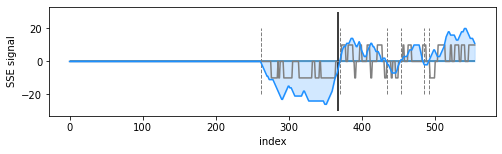

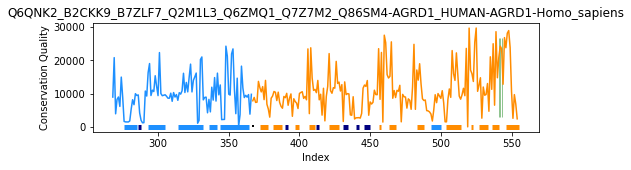

367 268 555


In [8]:
for gain in human_collection.collection:
    if "Q6QNK2" in gain.name:
        print("yea")
        gain.plot_helicality(savename="d1_helicality.svg")
        gain.plot_profile(savename='d1_profile.svg')
        print(gain.subdomain_boundary, gain.start, gain.end)
    #print(gain.name, gain.start, gain.end, gain.sequence, gain.index, gain.subdomain_boundary)
    #pdb_out = root_path+"human_32/trunc_pdbs/"+gain.name+"_gain.pdb"
    #ac = gain.name.split("-")[0]
    #found_pdb = [pdb for pdb in pdb_list if ac in pdb]
    #target_pdb = found_pdb[0]
    #gain.write_gain_pdb(target_pdb, pdb_out)


In [ ]:
"""plt.plot(human_collection.anchor_hist)
human_collection.plot_sse_hist(title=f"Receptor group: HUMAN_31 (Total: 31)",
                                   n_max=16,
                                   savename=f"hists/human_31.s2_newAnch.{enum}")"""

In [ ]:
#dir(valid_collection)
occupancy = np.zeros([aln_cutoff],dtype=int)
sse_matrix = np.zeros([len(valid_collection.collection), aln_cutoff])
for i, gain in enumerate(valid_collection.collection):
    #print(gain.sda_helices, gain.sdb_sheets)
#    for res_id in range(gain.start,gain.end+1):
    occupancy[gain.alignment_indices] += 1
    
    for helix in gain.sda_helices:
        for res_id in range(helix[0],helix[1]+1):
            sse_matrix[i,gain.alignment_indices[res_id]] = -1
    for sheet in gain.sdb_sheets:
        for res_id in range(sheet[0],sheet[1]+1):
            sse_matrix[i,gain.alignment_indices[res_id]] = 1

anchors , anchor_occupation = valid_collection.find_anchors(cutoff=3000)

In [ ]:
plt.figure(figsize=[math.ceil(aln_cutoff/600)+1,4])
plt.subplot(3,1,1)
plt.vlines(valid_collection.alignment_subdomain_boundary,-10000,10000, linewidth=3, color='k')
plt.plot(np.sum(sse_matrix, axis=0))
plt.subplot(3,1,2)
plt.vlines(valid_collection.alignment_subdomain_boundary, -50000,100000, linewidth=3, color='k')
plt.plot(np.convolve(np.sum(sse_matrix, axis=0), np.ones([20])))
plt.subplot(3,1,3)
plt.vlines(valid_collection.alignment_subdomain_boundary, 0, 13000, linewidth=3, color='k')
plt.bar(np.arange(aln_cutoff),valid_collection.anchor_hist, width=2)

for i, anchor in enumerate(anchors):
    print(i, anchor)
    if anchor < valid_collection.alignment_subdomain_boundary: 
        color = u'#1f77b4'
    else: 
        color = u'#ff7f0e'
    plt.scatter(anchor, valid_collection.anchor_hist[anchor]+1000, c=color, marker="1",s=60)
plt.savefig(f"000.big_signal.s2.{enum}.png", dpi=600, bbox_inches='tight')

In [ ]:
print(anchors)
print(anchor_occupation)
print(valid_collection.alignment_subdomain_boundary)
#sdb = 3425
#anchors = [662, 1194, 1912, 2490, 2983, 3260, 3455, 3461, 3739, 3998, 4295, 4850, 5347, 5461,
# 5813, 5853, 6337, 6659, 6715, 6772, 6808]
#anchor_occupation = [ 3896,  7206, 11169, 13756, 11165, 14086,  6206,  4106, 12116,  9369,
# 12987, 12103, 11190, 11077,  5610,  8639, 13998, 13267, 13936, 10506, 14303]
#anchor_dict = sse_func.make_anchor_dict(anchors, 3425)
anchor_dict = sse_func.make_anchor_dict(anchors, valid_collection.alignment_subdomain_boundary)
#dir(human_collection.collection[0])
#human_collection.collection[0].create_indexing(anchors, anchor_occupation, anchor_dict)
print(anchor_dict)
"""named_dirs = []
for gain in human_collection.collection:
    _,_, named_dir = gain.create_indexing(anchors, anchor_occupation, anchor_dict)
    named_dirs.append(named_dir)"""

In [ ]:
class Indexing:
    def __init__(self, aGainCollection, fasta_offsets=None, split_mode='single'):
        
        length = len(aGainCollection.collection)
        names = np.empty([length], dtype=object)
        indexing_dirs = np.empty([length], dtype=object)
        center_dirs = np.empty([length], dtype=object)
        offsets = np.zeros([length], dtype=int)
        total_keys = []
        center_keys = []
        if fasta_offsets is None:
            self.fasta_offsets = np.zeros([length])
        if fasta_offsets is not None: 
            corrected_offsets = []
            for i in range(length):
                # The existing FASTA offsets do not account for the residue starting not at 0,
                # Therefore the value of the starting res (gain.start) needs to be subtracted.
                corrected_offsets.append(fasta_offsets[i]-aGainCollection.collection[i].start)
            self.fasta_offsets = np.array(corrected_offsets, dtype=int)
            
        for gain_index, gain in enumerate(aGainCollection.collection):
            indexing_dir, indexing_centers = gain.create_indexing(anchors, 
                                                                  anchor_occupation, 
                                                                  anchor_dict,
                                                                  split_mode=split_mode)
            print(indexing_dir, indexing_centers)
            for key in indexing_dir.keys():
                if key not in total_keys:
                    total_keys.append(key)
                    
            for key in indexing_centers.keys():
                if key not in center_keys:
                    center_keys.append(key)                 
                
            indexing_dirs[gain_index] = indexing_dir
            center_dirs[gain_index] = indexing_centers
            # Patch ADGRC/CELSR naming
            names[gain_index] = gain.name.replace("CadherinEGFLAGseven-passG-typereceptor", "AGRC")
            offsets[gain_index] = gain.start

        self.indexing_dirs = indexing_dirs
        self.center_dirs = center_dirs
        self.names = names
        self.length = length
        self.offsets = offsets
        self.accessions = [gain.name.split("-")[0].split("_")[0] for gain in aGainCollection.collection]
        self.sequences = ["".join(gain.sequence) for gain in aGainCollection.collection]
        self.total_keys = sorted(total_keys)
        self.center_keys = sorted(center_keys)
        
        print("Total of keys found in the dictionaries:\n", self.total_keys, self.center_keys)
        print("First entry", self.indexing_dirs[0], self.center_dirs[0])
        
        header_list = ["Receptor", "Accession"] + self.total_keys + self.center_keys
        #header = "Receptor,Accession," + ",".join(self.total_keys) + ",".join(self.center_keys)
              
        header_dict = {}
        for idx, item in enumerate(header_list):
            header_dict[item] = idx

        data_matrix = np.full([self.length, len(header_dict.keys())], fill_value='', dtype=object)
        # Go through each of the sub-dictionaries and populate the dataframe:
        for row in range(self.length):
                # Q5T601_Q5KU15_..._Q9H615-AGRF1_HUMAN-AGRF1-Homo_sapiens.fa
                # 0                        1           2     3
            name_parts = self.names[row].split("-")
            data_matrix[row, header_dict["Receptor"]] = name_parts[2]
            data_matrix[row, header_dict["Accession"]] = name_parts[0].split("_")[0]
            offset = self.offsets[row]
            fa_offset = self.fasta_offsets[row]

            for key in self.indexing_dirs[row].keys():
                if key == "GPS":
                    sse=[int(x+fa_offset) for x in self.indexing_dirs[row][key]]
                    data_matrix[row, header_dict[key]] = f"{sse[0]}-{sse[-1]}"
                else:
                    sse = [int(x+offset+fa_offset) for x in self.indexing_dirs[row][key]]
                    data_matrix[row, header_dict[key]] = f"{sse[0]}-{sse[1]}"

            for key in self.center_dirs[row].keys():
                data_matrix[row, header_dict[key]] = str(self.center_dirs[row][key]+offset+fa_offset)
            
            self.data_header = ",".join(header_list)
            self.data_matrix = data_matrix

    def data2csv(self, outfile):
        with open(outfile, "w") as f:
            f.write(self.data_header+"\n")
            for row in range(self.length):
                f.write(",".join(self.data_matrix[row,:])+"\n")
        print("Completed file", outfile, ".")

In [ ]:
class GPCRDBIndexing:
    def __init__(self, aGainCollection, fasta_offsets=None, split_mode='single'):
        
        length = len(aGainCollection.collection)
        names = np.empty([length], dtype=object)
        indexing_dirs = np.empty([length], dtype=object)
        center_dirs = np.empty([length], dtype=object)
        offsets = np.zeros([length], dtype=int)
        total_keys = []
        center_keys = []
        if fasta_offsets is None:
            self.fasta_offsets = np.zeros([length])
        if fasta_offsets is not None: 
            corrected_offsets = []
            for i in range(length):
                # The existing FASTA offsets do not account for the residue starting not at 0,
                # Therefore the value of the starting res (gain.start) needs to be subtracted.
                corrected_offsets.append(fasta_offsets[i]-aGainCollection.collection[i].start)
            self.fasta_offsets = np.array(corrected_offsets, dtype=int)
            
        for gain_index, gain in enumerate(aGainCollection.collection):
            print("\n\n","_"*70,"\n",gain.name,"\n",
                 f"{gain.a_breaks = }\n {gain.b_breaks = }\n")
            indexing_dir, indexing_centers, _ = gain.create_indexing(anchors, 
                                                    anchor_occupation, 
                                                    anchor_dict,
                                                    split_mode=split_mode)
            
            print(indexing_dir, indexing_centers)
            for key in indexing_dir.keys():
                if key not in total_keys:
                    total_keys.append(key)
                    
            for key in indexing_centers.keys():
                if key not in center_keys:
                    center_keys.append(key)                 
                
            indexing_dirs[gain_index] = indexing_dir
            center_dirs[gain_index] = indexing_centers
            # Patch ADGRC/CELSR naming
            names[gain_index] = gain.name.replace("CadherinEGFLAGseven-passG-typereceptor", "AGRC")
            offsets[gain_index] = gain.start

        self.indexing_dirs = indexing_dirs
        self.center_dirs = center_dirs
        self.names = names
        self.length = length
        self.offsets = offsets
        self.accessions = [gain.name.split("-")[0].split("_")[0] for gain in aGainCollection.collection]
        self.sequences = ["".join(gain.sequence) for gain in aGainCollection.collection]
        self.total_keys = sorted(total_keys)
        self.center_keys = sorted(center_keys)
        
        print("Total of keys found in the dictionaries:\n", self.total_keys, self.center_keys)
        print("First entry", self.indexing_dirs[0], self.center_dirs[0])
        
        header_list = ["Receptor", "Accession"] + self.total_keys + self.center_keys
        #header = "Receptor,Accession," + ",".join(self.total_keys) + ",".join(self.center_keys)
        new_header = ["Receptor", "Accession", "GPS-2", "GPS-1", "GPS+1"]
        for j in self.center_keys:
            new_header.append(f"{j[:-3]}.start")
            new_header.append(f"{j[:-3]}.anchor")
            new_header.append(f"{j[:-3]}.end")
        
        gpcr_db_matrix = np.full([self.length, len(new_header)], fill_value='', dtype=object)

        header_dict = {}
        for idx, item in enumerate(header_list):
            header_dict[item] = idx
        gpcr_header_dict = {}
        for idx, key in enumerate(new_header):
            gpcr_header_dict[key] = idx
        print(gpcr_header_dict)
        data_matrix = np.full([self.length, len(gpcr_header_dict.keys())], fill_value='', dtype=object)
        # Go through each of the sub-dictionaries and populate the dataframe:
        for row in range(self.length):
                # Q5T601_Q5KU15_..._Q9H615-AGRF1_HUMAN-AGRF1-Homo_sapiens.fa
                # 0                        1           2     3
            name_parts = self.names[row].split("-")
            data_matrix[row, gpcr_header_dict["Receptor"]] = name_parts[2]
            data_matrix[row, gpcr_header_dict["Accession"]] = name_parts[0].split("_")[0]
            offset = self.offsets[row]
            fa_offset = self.fasta_offsets[row]

            for key in self.indexing_dirs[row].keys():
                if key == "GPS":
                    sse=[int(x+fa_offset) for x in self.indexing_dirs[row][key]]
                    data_matrix[row, 2:5] = [str(sse[0]), str(sse[1]), str(sse[2])]
                else:
                    sse = [int(x+offset+fa_offset) for x in self.indexing_dirs[row][key]]
                    data_matrix[row, gpcr_header_dict[f"{key}.start"]] = str(sse[0])
                    data_matrix[row, gpcr_header_dict[f"{key}.end"]] = str(sse[1])

            for key in self.center_dirs[row].keys():
                data_matrix[row, gpcr_header_dict[key.replace(".50",".anchor")]] = str(self.center_dirs[row][key]+offset+fa_offset)
            
            self.data_header = ",".join(new_header)
            self.data_matrix = data_matrix

    def data2csv(self, outfile):
        with open(outfile, "w") as f:
            f.write(self.data_header+"\n")
            for row in range(self.length):
                f.write(",".join(self.data_matrix[row,:])+"\n")
        print("Completed file", outfile, ".")

In [ ]:
#offset information
def find_offsets(fasta_file, accessions, sequences):
    # searches through the accessions in the big sequence file,
    # finds the start for the provided sequence
    with open(fasta_file,"r") as fa:
        fa_data = fa.read()
        fasta_entries = fa_data.split(">")
    seqs = []
    headers = []
    offsets = []
    for seq in fasta_entries:
        # Fallback for too short sequences
        if len(seq) < 10: 
            continue
        data = seq.strip().split("\n")
        headers.append(data[0].split("|")[1]) # This is only the UniProtKB Accession Number and will be matched EXACTLY
        seqs.append("".join(data[1:]))
    
    heads = np.array(headers)
    for idx, accession in enumerate(accessions):
        #print(np.where(heads == accession))
        seq_idx = np.where(heads == accession)[0][0]
        offset = sse_func.find_the_start(seqs[seq_idx], sequences[idx])
        #print(offset)
        offsets.append(offset)
    
    return offsets

In [ ]:
mode = 'double'

human_accessions = [gain.name[:6] for gain in human_collection.collection]
human_gain_seqs = [gain.sequence for gain in human_collection.collection]
print(human_accessions)
#for gain in human_collection.collection:
#    print(gain.name,"\n",gain.a_breaks,"\n",gain.b_breaks,"\n","_"*70)

big_seq_file = "/home/hildilab/projects/GPS_massif/uniprot_query/agpcr_celsr.fasta"
#human_base = GPCRDBIndexing(human_collection, split_mode=mode)
raw_offsets = find_offsets(big_seq_file, human_accessions, human_gain_seqs)
refined_offsets = []
for j, gain in enumerate(human_collection.collection):
    refined_offsets.append(raw_offsets[j]-gain.start)
print(raw_offsets)
print(refined_offsets)

#
#fasta_offsets = find_offsets(big_seq_file, 
#                                 human_base.accessions, 
#                                 human_base.sequences)
#print(fasta_offsets)
#fa_human_base = GPCRDBIndexing(human_collection, fasta_offsets = fasta_offsets, split_mode=mode)
#print(fa_human_base.data2csv)
#human_base.data2csv(f"default_indexed_s2_s2a_re_{mode}_gpcrdb.{enum}.csv")
#fa_human_base.data2csv(f"uniprot_indexed_s2_s2a_re_{mode}_gpcrdb.{enum}.csv")

In [ ]:
all_base = GPCRDBIndexing(valid_collection, split_mode=mode)

fasta_offsets = find_offsets(big_seq_file, 
                                 all_base.accessions, 
                                 all_base.sequences)
all_base.data2csv(f"default_indexed_all_{mode}.cut.16.csv")
fa_all_base = GPCRDBIndexing(valid_collection, fasta_offsets = fasta_offsets, split_mode=mode)

fa_all_base.data2csv(f"uniprot_indexed_all_{mode}.cut.16.csv")

In [ ]:
def offset_pdb(in_pdb, out_pdb, offset):
    with open(in_pdb,"r") as p:
        data = p.readlines()
    offset_pdb = open(out_pdb, "w")
    
    for line in data:
        if line.startswith("ATOM"):
            res_id = int(line[22:26])
            offset_pdb.write(f"{line[:22]}{str(res_id+offset).rjust(4)}{line[26:]}")
        else:
            offset_pdb.write(line)
    
    print(f"Created PDB {out_pdb} with last residue {res_id+offset}. Total offset {offset} .")

In [ ]:
#in_pdbs = glob.glob("/home/hildilab/projects/agpcr_nom/human_31/aligned/subd_B/trunc_pdbs/*.pdb")

In [ ]:
"""for i, offset in enumerate(fa_human_base.fasta_offsets):
    sub_pdb = [pdb for pdb in in_pdbs if fa_human_base.accessions[i] in pdb][0]
    offset_pdb(sub_pdb, sub_pdb.replace("trunc_pdbs","uniprot_indexed_pdbs"), offset)"""

In [ ]:
for i, gain in enumerate(human_collection.collection):
    #if "Q6QNK2" in gain.name:
        x1, x2 = gain.create_indexing(anchors, anchor_occupation, anchor_dict, 
                    outdir = "/home/hildilab/projects/agpcr_nom/human_31/indexing_files_s2_dsp",
                    #offset = fasta_offsets[i]-gain.start+1,
                    split_mode='double')
        
        print(x1, x2)

[('Q6QNK2_B2CKK9_B7ZLF7_Q2M1L3_Q6ZMQ1_Q7Z7M2_Q86SM4-AGRD1_HUMAN-AGRD1-Homo_sapiens', 'TPDEIAMYFTAAIGKHALLSSTLPSLFMTSTASPVMPTDAYHPIITNLTEERKTFQSPGVILSYLQNVSLSLPSKSLSEQTALNLTKTFLKAVGEILLLPGWIALSEDSAVVLSLIDTIDTVMGHVSSNLHGSTPQVTVEGSSAMAEFSVAKILPKTVNSSHYRFPAHGQSFIQIPHEAFHRHAWSTVVGLLYHSMHYYLNNIWPAHTKIAEAMHHQDCLLFATSHLISLEVSPPPTLSQNLSGSPLITVHLKHRLTRKQHSEATNSSNRVFVYCAFLDFSSGEGVWSNHGCALTRGNLTYSVCRCTHLTNFAILMQVVPL')]
self.sequence = array(['P', 'T', 'L', 'S', 'Q', 'N', 'L', 'S', 'G', 'S', 'P', 'L', 'I',
       'T', 'V', 'H', 'L', 'K', 'H', 'R', 'L', 'T', 'R', 'K', 'Q', 'H',
       'S', 'E', 'A', 'T', 'N', 'S', 'S', 'N', 'R', 'V', 'F', 'V', 'Y',
       'C', 'A', 'F', 'L', 'D', 'F', 'S', 'S', 'G', 'E', 'G', 'V', 'W',
       'S', 'N', 'H', 'G', 'C', 'A', 'L', 'T', 'R', 'G', 'N', 'L', 'T',
       'Y', 'S', 'V', 'C', 'R', 'C', 'T', 'H', 'L', 'T', 'N', 'F', 'A',
       'I', 'L', 'M', 'Q', 'V', 'V', 'P', 'L'], dtype='<U1')
self.start = 235
self.end = 555
len(self.sequence) = 86
Found the start! aln_sta

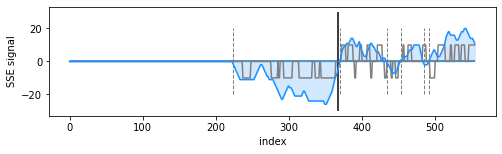

In [9]:
d1_seqs = ["Q6QNK2"]
d1 = filter_by_list(valid_seqs, d1_seqs)
print(d1)
Xalignment_file = "/home/hildilab/projects/agpcr_nom/big_mafft14792.fa" # This is a combined alignment of ALL sequences in ALL queries!
Xquality_file = "/home/hildilab/projects/agpcr_nom/big_mafft14792.jal"  # ^ corresponding quality file
Xquality = sse_func.read_quality(Xquality_file)
Xgps_minus_one = 19258 #appended_big_mafft: 21160  #big_mafft14792: 19258
Xaln_cutoff = 19822 #appended_big_mafft: 21813 #big_mafft14792: 19822
Xstride_files = glob.glob("/home/hildilab/projects/agpcr_nom/all_gps_stride/*")
Xalignment_dict = sse_func.read_alignment(alignment_file, aln_cutoff)
Xname, Xseq = d1[0]
d1_stride = "/home/hildilab/projects/agpcr_nom/all_gps_stride/Q6QNK2_B2CKK9_B7ZLF7_Q2M1L3_Q6ZMQ1_Q7Z7M2_Q86SM4-AGRD1_HUMAN-AGRD1-Homo_sapiens.stride"
d1_gain = GainDomain(alignment_file = Xalignment_file,
                                        aln_cutoff = Xaln_cutoff,
                                        quality = Xquality,
                                        gps_index = Xgps_minus_one,
                                        name=Xname,
                                        #stride_files = Xstride_files,
                                        sequence = Xseq,
                                        alignment_dict = Xalignment_dict,
                                        explicit_stride_file=d1_stride,
                                        is_truncated = False,
                                        coil_weight = 0.0, # TESTING
                                        stride_outlier_mode = True,
                                        without_anchors=True)

d1_gain.plot_helicality(savename="d1_helicality.full.svg")
print(d1_gain.subdomain_boundary, d1_gain.start, d1_gain.end)
    #print(gain.name, gain.start, gain.end, gain.sequence, gain.index, gain.subdomain_boundary)
    #pdb_out = root_path+"human_32/trunc_pdbs/"+gain.name+"_gain.pdb"
    #ac = gain.name.split("-")[0]
    #found_pdb = [pdb for pdb in pdb_list if ac in pdb]
    #target_pdb = found_pdb[0]
    #gain.write_gain_pdb(target_pdb, pdb_out) """